# Hello Object Dection with Transformers

In [ ]:
# Prerequsites & Dependencies
import os
from PIL import Image, ImageDraw, ImageFont   # pip install pillow
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import pipeline   # pip install transformers[torch]

# pip install ipywidgets
# pip install timm
# pip install huggingface_hub[hf_xet]

In [18]:
def plot_with_bounding_boxes(image, bounding_boxes):
    ''' Helper function to plot image with bounding boxes '''

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Add bounding boxes to the image
    for bbox in bounding_boxes:
        xmin, ymin, xmax, ymax = bbox['box']['xmin'], bbox['box']['ymin'], bbox['box']['xmax'], bbox['box']['ymax']
        width, height = xmax - xmin, ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin, f"{bbox['label']}:{bbox['score']:.2f}", color='white', fontsize=12,
                 bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')  # Hide axes
    plt.show()

In [ ]:
def display_with_bounding_boxes(image, bounding_boxes):
    '''Displays an image with bounding boxes drawn around detected objects.'''

    draw = ImageDraw.Draw(image)   # Create a drawing context

    try:
        font = ImageFont.load_default()  # Load a default font
    except:
        print("*** WARNING: Font loading failed")
        font = None

    for bbox in bounding_boxes:  # Iterate over each bounding box
        label = bbox['label']
        score = bbox['score']
        coords = bbox['box']  # xmin, ymin, xmax, ymax

        xmin, ymin = coords['xmin'], coords['ymin']
        xmax, ymax = coords['xmax'], coords['ymax']

        # Draw the bounding box
        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red", width=3)

        # Prepare label text
        text = f"{label} {score:.2f}"
        text_bbox = draw.textbbox((xmin, ymin), text, font=font)
        draw.rectangle(text_bbox, fill="red")
        draw.text((xmin, ymin), text, fill="white", font=font)

    # Display the final image with bounding boxes inside the notebook
    display(image)

config.json: 0.00B [00:00, ?B/s]

d:\MyGithub\ML_2D_Object_Detection_Experiments\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Jari\.cache\huggingface\hub\models--hustvl--yolos-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to r

model.safetensors:   0%|          | 0.00/123M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

Device set to use cpu


Picture: abu_dhabi_camel.jpg


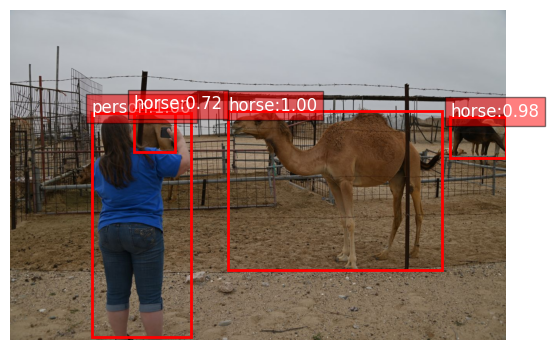

Picture: auto_rigshaws.jpg


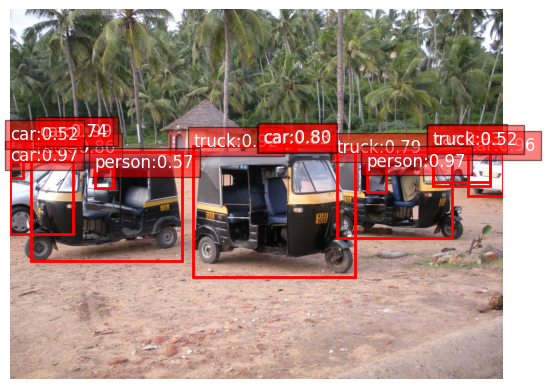

Picture: cargo_ship.jpg


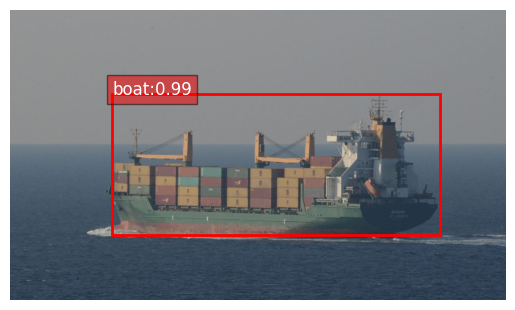

Picture: elephant.jpg


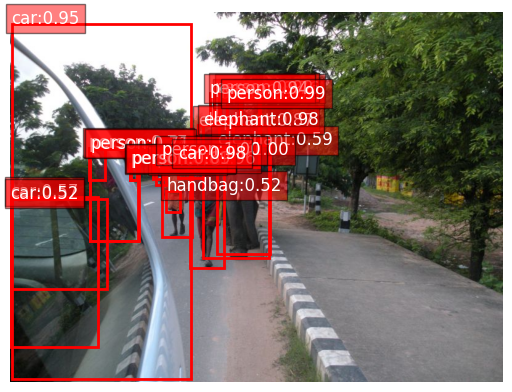

Picture: miami_beach.jpg


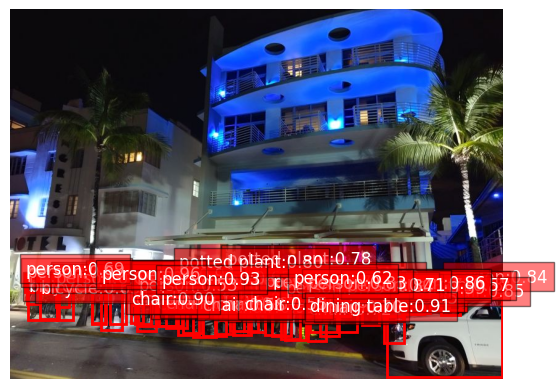

Picture: motorcycle.jpg


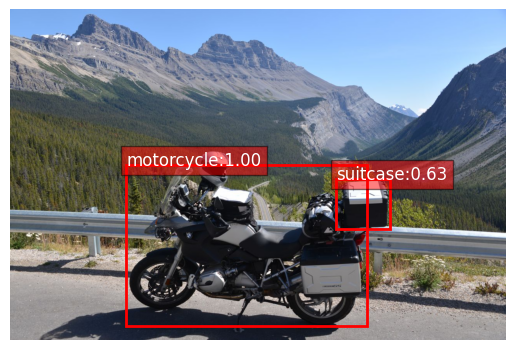

Picture: motorcycles.jpg


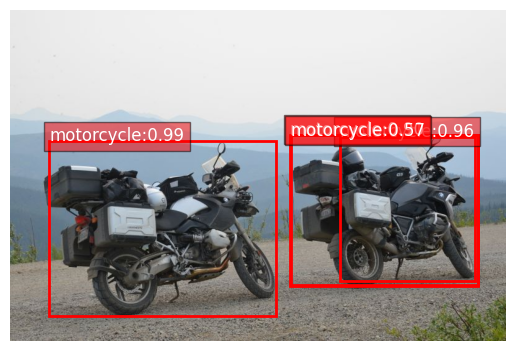

Picture: ships.jpg


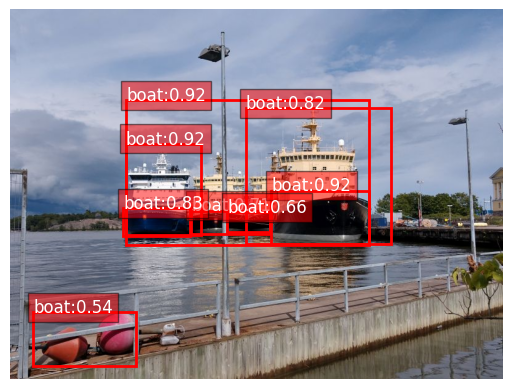

Picture: traffic.jpg


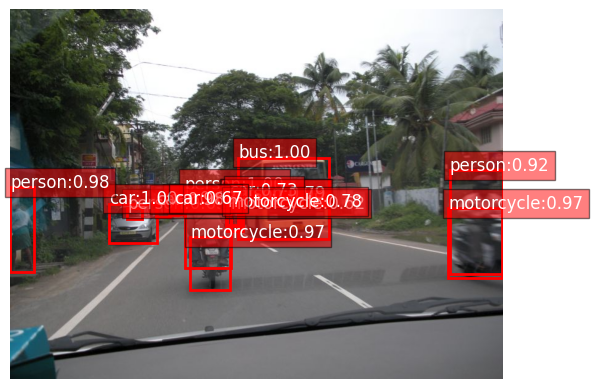

In [24]:
images_path = "images"

#detector = pipeline("object-detection", model="facebook/detr-resnet-50")
#detector = pipeline("object-detection", model="hustvl/yolos-tiny")
detector = pipeline("object-detection", model="hustvl/yolos-small")
#detector = pipeline("object-detection", model="hustvl/yolos-base")


for filename in os.listdir(images_path):
    file_path = os.path.join(images_path, filename)

    # Only process image files
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        print(f"Picture: {filename}")
        image = Image.open(file_path)

        # Run detection
        bounding_boxes = detector(image)

        # Display image with bounding boxes
        #display_with_bounding_boxes(image, bounding_boxes)
        plot_with_bounding_boxes(image, bounding_boxes)
